> import pandas, numpy, statistics, seaborn

The libraries `pandas`, `numpy`, `statistics`, and `seaborn` are now imported and ready for use. How can I assist you further?

> load dataset - customer transactions

In [1]:
import pandas as pd
customer_transactions = pd.read_csv('customer_transactions_contaminated.csv')
customer_transactions

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer
...,...,...,...,...,...,...
3195,59f8afe5-173b-4e52-b641-f98183f1a891,3121df10-58e5-4ed4-a05c-b1f12df6bcc7,2023-01-18,892.44,Home & Garden,Bank Transfer
3196,16d0b561-279d-4da9-9aa8-8c5906dff79a,dff4f636-2c55-4237-8c55-efb15b05949b,2024-02-13,431.64,Health & Beauty,Credit Card
3197,34e3f558-622e-4d6b-8d5d-07ab632e1b95,db0a4640-ea96-4fcd-989b-b71ba767529c,2022-12-26,NaN,Home & Garden,PayPal
3198,d83178cf-653d-435c-a7e8-880361dec6e7,89a1c0bc-4d49-4913-bb0f-26bd56b46a34,2022-09-26,343.46,Health & Beauty,Debit Card


The customer transactions dataset has been loaded. It contains 3200 rows and 6 columns: CustomerID, TransactionID, TransactionDate, Amount, ProductCategory, and PaymentMethod.

> View the first few rows of the dataset with head() to get an overview of the data.

In [2]:
customer_transactions.head()

,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer


The first few rows of the dataset have been displayed. Let me know if you need any further analysis or information.

> Check the shape of the dataset using shape to understand how many rows and columns are present.

In [3]:
customer_transactions.shape

(3200, 6)

The dataset contains 3200 rows and 6 columns.

> check for null values

In [5]:
customer_transactions.isnull().sum()

CustomerID           0
TransactionID        0
TransactionDate      0
Amount             304
ProductCategory    299
PaymentMethod        0
dtype: int64

The dataset contains 304 null values in the "Amount" column and 299 null values in the "ProductCategory" column.

> for amount, free should shoud be nan. for product category change the null values to Not Provided

In [6]:
# Replace 'free' with NaN in the 'Amount' column
customer_transactions['Amount'] = customer_transactions['Amount'].replace('free', pd.NA)

# Replace null values in 'ProductCategory' with 'Not Provided'
customer_transactions['ProductCategory'] = customer_transactions['ProductCategory'].fillna('Not Provided')

customer_transactions.isnull().sum()

CustomerID           0
TransactionID        0
TransactionDate      0
Amount             304
ProductCategory      0
PaymentMethod        0
dtype: int64

The 'Amount' column still contains 304 null values, and the 'ProductCategory' column no longer has any null values after replacing them with 'Not Provided'.

> dtypes

In [7]:
customer_transactions.dtypes

CustomerID         object
TransactionID      object
TransactionDate    object
Amount             object
ProductCategory    object
PaymentMethod      object
dtype: object

The data types of the columns in the dataset are all currently set as `object`.

> transactiondate should be datetime64[ns], amount is float64, ProductCategory is category, PaymentMethod category

In [8]:
customer_transactions['TransactionDate'] = pd.to_datetime(customer_transactions['TransactionDate'])

ValueError: time data "01/04/2024" doesn't match format "%Y-%m-%d", at position 31. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [9]:
# Attempt to parse the dates with dayfirst=True
customer_transactions['TransactionDate'] = pd.to_datetime(customer_transactions['TransactionDate'], dayfirst=True)

/tmp/ipykernel_193/2043514802.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  customer_transactions['TransactionDate'] = pd.to_datetime(customer_transactions['TransactionDate'], dayfirst=True)


ValueError: time data "01/04/2024" doesn't match format "%Y-%m-%d", at position 31. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
# Attempt to parse the dates with format='mixed'
customer_transactions['TransactionDate'] = pd.to_datetime(customer_transactions['TransactionDate'], format='mixed', dayfirst=True)

In [11]:
# Convert 'Amount' to float
customer_transactions['Amount'] = pd.to_numeric(customer_transactions['Amount'], errors='coerce')

In [12]:
# Convert 'ProductCategory' and 'PaymentMethod' to category
dtype_conversion = {
    'ProductCategory': 'category',
    'PaymentMethod': 'category'
}
customer_transactions = customer_transactions.astype(dtype_conversion)

customer_transactions.dtypes

CustomerID                 object
TransactionID              object
TransactionDate    datetime64[ns]
Amount                    float64
ProductCategory          category
PaymentMethod            category
dtype: object

The data types have been successfully updated: 'TransactionDate' is now datetime64[ns], 'Amount' is float64, 'ProductCategory' and 'PaymentMethod' are category.

> remove duplicates

In [13]:
# Remove duplicate rows from the dataset
customer_transactions.drop_duplicates(inplace=True)

# Check the shape of the dataset after removing duplicates
customer_transactions.shape

(3015, 6)

Duplicates have been removed, reducing the dataset to 3015 rows.

> amount should not have any negative values, set it to nan

In [22]:
# Set negative values in 'Amount' to NaN
customer_transactions.loc[customer_transactions['Amount'] < 0, 'Amount'] = pd.NA

# Check for any negative values remaining
(customer_transactions['Amount'] < 0).sum()

0

Negative values in the 'Amount' column have been set to NaN.

> check for outliers on all

In [23]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'Amount' column
Q1 = customer_transactions['Amount'].quantile(0.25)
Q3 = customer_transactions['Amount'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers = customer_transactions[(customer_transactions['Amount'] < (Q1 - 1.5 * IQR)) | (customer_transactions['Amount'] > (Q3 + 1.5 * IQR))]

outliers.shape

(0, 6)

There are no outliers in the 'Amount' column based on the IQR method.

> EDA for all without outliers

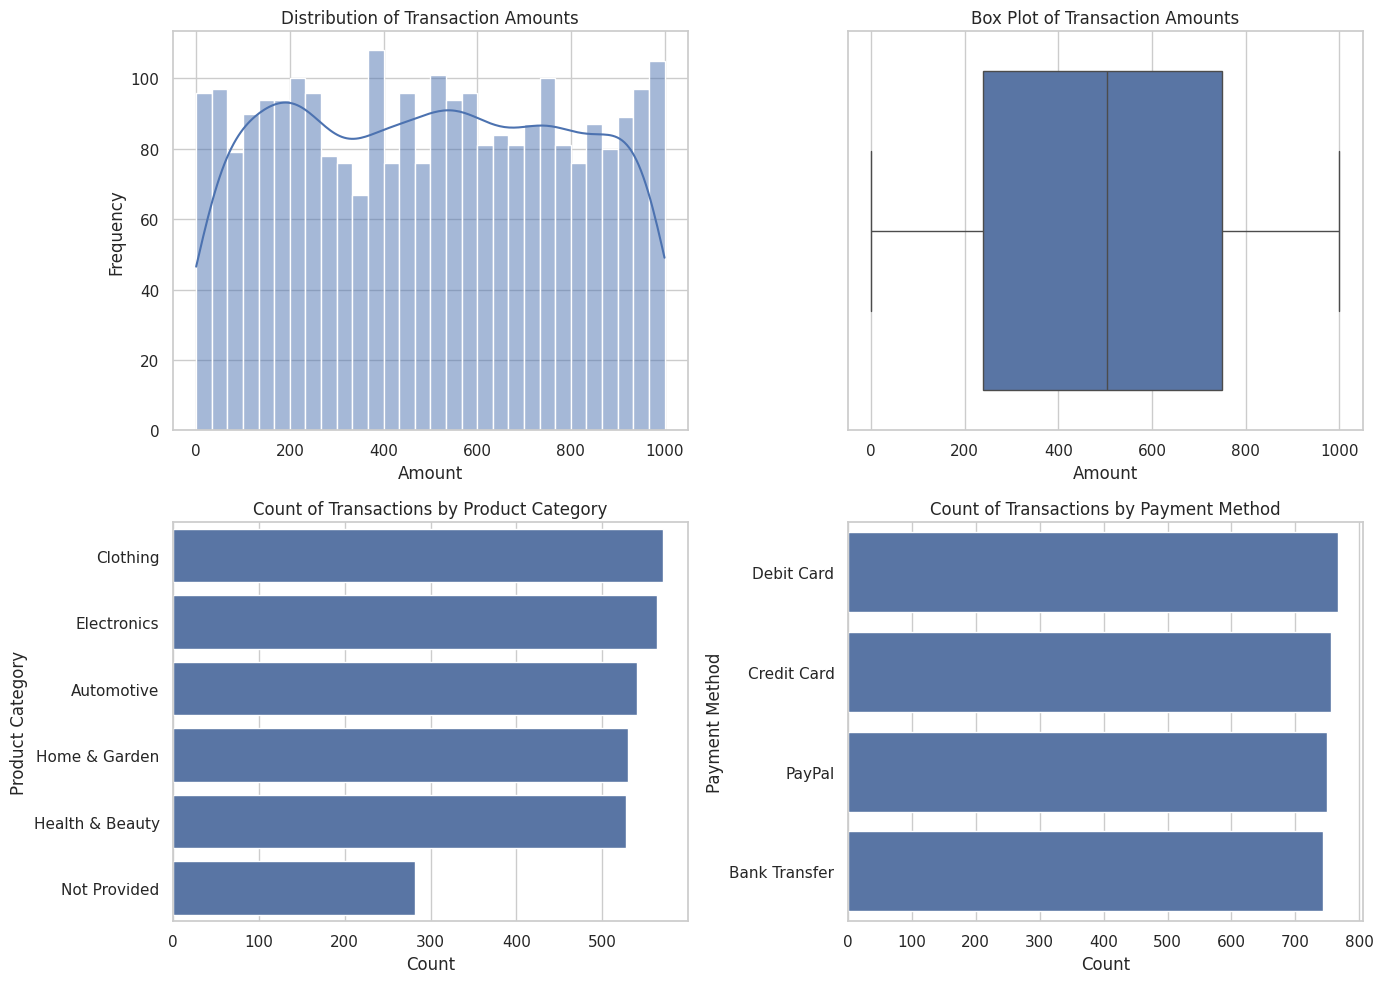

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution plot for 'Amount'
sns.histplot(customer_transactions['Amount'].dropna(), bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Transaction Amounts')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')

# Box plot for 'Amount'
sns.boxplot(x=customer_transactions['Amount'].dropna(), ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Transaction Amounts')
axes[0, 1].set_xlabel('Amount')

# Count plot for 'ProductCategory'
sns.countplot(y=customer_transactions['ProductCategory'], order=customer_transactions['ProductCategory'].value_counts().index, ax=axes[1, 0])
axes[1, 0].set_title('Count of Transactions by Product Category')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Product Category')

# Count plot for 'PaymentMethod'
sns.countplot(y=customer_transactions['PaymentMethod'], order=customer_transactions['PaymentMethod'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Count of Transactions by Payment Method')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Payment Method')

# Adjust layout
plt.tight_layout()
plt.show()

The exploratory data analysis (EDA) has been completed with visualizations for the transaction amounts, product categories, and payment methods.

> save clean csv as cleaned_customer_transaction

In [25]:
# Save the cleaned dataset to a CSV file
customer_transactions.to_csv('cleaned_customer_transaction.csv', index=False)

The cleaned dataset has been saved as `cleaned_customer_transaction.csv`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75d892d6-30c7-41a5-bc07-70602fe7eb28' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>